In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import zipfile
from zipfile import ZipFile

In [3]:
file_name = "data/moving2.zip"

In [4]:
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

File Name                                             Modified             Size
moving2.csv                                    2021-03-11 16:08:44     35879985


<h3 style="color:green;">SCREENSHOT OF RUNNING SCENE IN FACTORY IO</h3>
<p>Factory I/O is a 3D factory simulation for learning automation technologies. Designed to be easy to use, it allows to quickly build a virtual factory using a selection of common industrial parts.

Factory I/O also includes many scenes inspired by typical industrial applications, ranging from beginner to advanced difficulty levels.

The most common scenario is to use Factory I/O as a PLC training platform since PLC are the most common controllers found in industrial applications. However, it can also be used with microcontrollers, SoftPLC, Modbus, among many other technologies.</p>

<a href="url">https://factoryio.com/</a>

![title](images/Conveyor.PNG)

<h3 style="color:green;">SCREENSHOT OF CONTROL IO CONFIGURATOR</h3>
<p>CONTROL I/O is an easy to use, brand independent SoftPLC, designed from the ground up for FACTORY I/O.<br> The goal of CONTROL I/O is to provide a simple and intuitive experience for anyone starting in the world of automation.</p>
<a href="url">https://docs.factoryio.com</a>

![title](images/Control_IO.PNG)

<h3 style="color:green;">APPLYING THE GENERATED MODEL<h3>
<p style="font-weight: normal;">Using the model created in the previous process against the current running conditions.</p>

In [5]:
#Importing the csv file created in factory io
#File currently contains 6 Columns and 682,211 Rows
data = pd.read_csv('data/moving2.zip')
df = pd.DataFrame(data)

In [6]:
#Check data is imported
df.head(20)

,Sensor/Actuator,Data Type,Name,Address,Current Value,Time Elapsed
0,Sensor,Bool,FACTORY I/O (Running),496,True,6.783351
1,Sensor,Bool,FACTORY I/O (Paused),497,False,6.783351
2,Sensor,Bool,FACTORY I/O (Reset),498,False,6.783351
3,Sensor,Bool,Retroreflective Sensor 1,0,False,6.783351
4,Sensor,Float,FACTORY I/O (Time Scale),240,1,6.783351
5,Sensor,Int,Light Array Emitter 1 (Value),0,0,6.783351
6,Actuator,Bool,FACTORY I/O (Run),496,True,6.783351
7,Actuator,Bool,FACTORY I/O (Pause),497,False,6.783351
8,Actuator,Bool,FACTORY I/O (Reset),498,False,6.783351
9,Actuator,Bool,Roller Conveyor (6m) 1,1,True,6.783351


In [7]:
#Subseting all Light Array Emitter data
filteredLAE = df[df[' Name']=='Light Array Emitter 1 (Value)']
#converting the current value column to numeric
#using a copy to prevent index warning
filteredLAE = filteredLAE.copy()
filteredLAE[' Current Value'] = pd.to_numeric(filteredLAE[' Current Value'])

In [8]:
filteredLAE[' Sensor Value Difference'] = filteredLAE[' Current Value'].diff()
filteredLAE

,Sensor/Actuator,Data Type,Name,Address,Current Value,Time Elapsed,Sensor Value Difference
5,Sensor,Int,Light Array Emitter 1 (Value),0,0,6.783351,NaN
22,Sensor,Int,Light Array Emitter 1 (Value),0,0,6.883351,0.0
39,Sensor,Int,Light Array Emitter 1 (Value),0,0,6.975019,0.0
56,Sensor,Int,Light Array Emitter 1 (Value),0,0,7.066686,0.0
73,Sensor,Int,Light Array Emitter 1 (Value),0,0,7.166686,0.0
...,...,...,...,...,...,...,...
682130,Sensor,Int,Light Array Emitter 1 (Value),0,192,4014.250000,0.0
682147,Sensor,Int,Light Array Emitter 1 (Value),0,192,4014.341000,0.0
682164,Sensor,Int,Light Array Emitter 1 (Value),0,192,4014.457000,0.0
682181,Sensor,Int,Light Array Emitter 1 (Value),0,192,4014.548000,0.0


In [9]:
#filteredLAE.to_csv (r'C:\Users\a.sethu\Desktop\Python\export.csv', index = False, header=True)

In [10]:
#Filtering sensor trigger data points from the data by removing 
#all all data with current value = 0
filteredLAE = filteredLAE[filteredLAE[' Sensor Value Difference'] != 0]
filteredLAE = filteredLAE[filteredLAE[' Current Value']!=128 ]
filteredLAE = filteredLAE[filteredLAE[' Current Value']!=64 ]
#Dropping al NaN values
filteredLAE.dropna(subset = [' Sensor Value Difference'], inplace=True)
filteredLAE

,Sensor/Actuator,Data Type,Name,Address,Current Value,Time Elapsed,Sensor Value Difference
1909,Sensor,Int,Light Array Emitter 1 (Value),0,192,17.96656,64.0
2266,Sensor,Int,Light Array Emitter 1 (Value),0,0,20.07486,-192.0
2538,Sensor,Int,Light Array Emitter 1 (Value),0,192,21.68317,192.0
2912,Sensor,Int,Light Array Emitter 1 (Value),0,0,23.88313,-192.0
3694,Sensor,Int,Light Array Emitter 1 (Value),0,192,28.46640,128.0
...,...,...,...,...,...,...,...
679869,Sensor,Int,Light Array Emitter 1 (Value),0,192,4000.99300,192.0
680226,Sensor,Int,Light Array Emitter 1 (Value),0,0,4003.09300,-192.0
681076,Sensor,Int,Light Array Emitter 1 (Value),0,192,4008.08200,192.0
681450,Sensor,Int,Light Array Emitter 1 (Value),0,0,4010.25700,-192.0


In [11]:
filteredLAE=filteredLAE.copy()
filteredLAE[filteredLAE[' Sensor Value Difference'] > 0]
filteredLAE['Trigger Status']="Off"
filteredLAE['Trigger Status'] = filteredLAE.apply(lambda x: 'On' if x[' Sensor Value Difference']>0 else 'Off',axis=1)

In [12]:
filteredLAE['Trigger Interval'] = filteredLAE[" Time Elapsed"].diff(1)

In [13]:
preprocessedDF = filteredLAE[filteredLAE['Trigger Status']=='On']

In [14]:
preprocessedDF = preprocessedDF.copy()
preprocessedDF['Trigger Interval'] = preprocessedDF[" Time Elapsed"].diff(1)
preprocessedDF.dropna(subset = ['Trigger Interval'], inplace=True)
preprocessedDF

,Sensor/Actuator,Data Type,Name,Address,Current Value,Time Elapsed,Sensor Value Difference,Trigger Status,Trigger Interval
2538,Sensor,Int,Light Array Emitter 1 (Value),0,192,21.68317,192.0,On,3.71661
3694,Sensor,Int,Light Array Emitter 1 (Value),0,192,28.46640,128.0,On,6.78323
4731,Sensor,Int,Light Array Emitter 1 (Value),0,192,34.56642,192.0,On,6.10002
6312,Sensor,Int,Light Array Emitter 1 (Value),0,192,43.86673,192.0,On,9.30031
7094,Sensor,Int,Light Array Emitter 1 (Value),0,192,48.47523,192.0,On,4.60850
...,...,...,...,...,...,...,...,...,...
678611,Sensor,Int,Light Array Emitter 1 (Value),0,192,3993.63800,192.0,On,6.09300
679393,Sensor,Int,Light Array Emitter 1 (Value),0,192,3998.21200,192.0,On,4.57400
679869,Sensor,Int,Light Array Emitter 1 (Value),0,192,4000.99300,192.0,On,2.78100
681076,Sensor,Int,Light Array Emitter 1 (Value),0,192,4008.08200,192.0,On,7.08900


([], [])

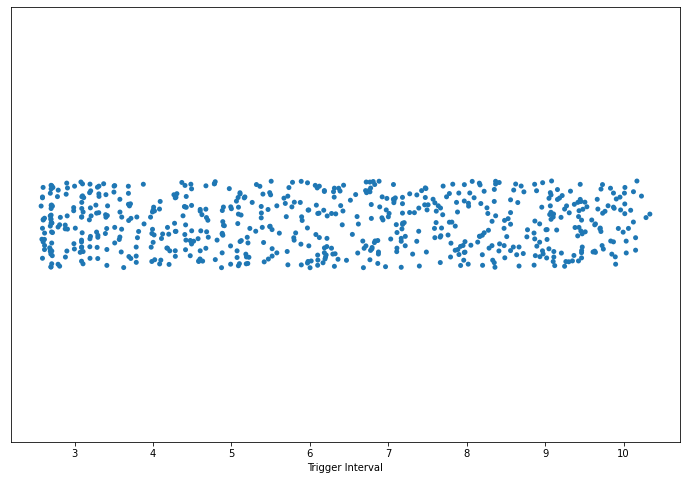

In [15]:
import seaborn as sns
preprocessedDF=preprocessedDF.reset_index(drop=True)
plt.figure(figsize=(12,8)) #Plotting the data points on the plot
sns.stripplot(x='Trigger Interval',data = preprocessedDF,jitter= True,edgecolor = 'None')
sns.despine
locs,labels = plt.xticks()
plt.yticks([])

In [16]:
import jenkspy
#Finding the breaks using the Jenks natural breaks optimzation method
breaks = jenkspy.jenks_breaks(preprocessedDF['Trigger Interval'],nb_class = 3)

In [17]:
#show ranges
breaks

[2.57300000000032, 4.816000000000031, 7.506499999999988, 10.33400000000006]

<AxesSubplot:xlabel='Trigger Interval'>

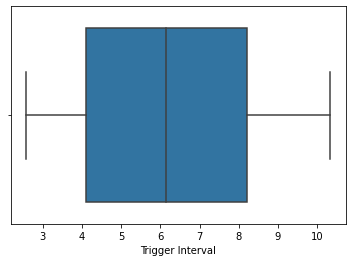

In [18]:
#Box plot
import numpy as np
sns.boxplot(x='Trigger Interval', data=preprocessedDF, whis=np.inf)

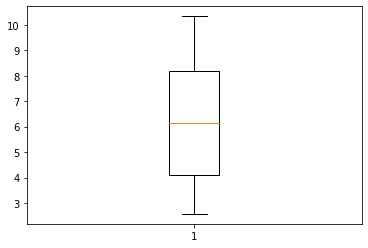

In [19]:
array_list = []
B = plt.boxplot(preprocessedDF['Trigger Interval'])
[array_list.append(item.get_ydata()) for item in B['whiskers']]
download_list = []
for item in array_list:
    download_list.append(item[0])

![title](images/idealRange.PNG)
![title](images/idealBoxplot.PNG)

In [20]:
#All code below this is tp be ignored was used only for research purposes
#Removing data outside the range of3.8 to 8.7 for testing purposes
dummydata = preprocessedDF[preprocessedDF['Trigger Interval']>3.8]
dummydata = dummydata[dummydata['Trigger Interval']<8.7]

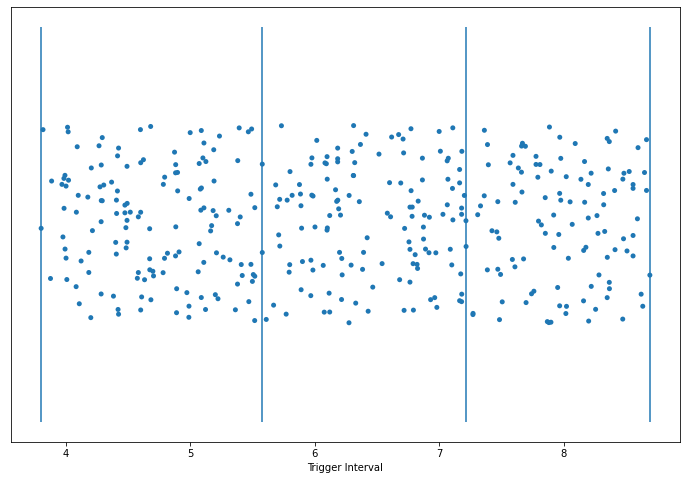

In [21]:
dummydata=dummydata.reset_index(drop=True)
import jenkspy
#Finding the breaks using the Jenks natural breaks optimzation method
breaks = jenkspy.jenks_breaks(dummydata['Trigger Interval'],nb_class = 3)
#seaborn library for plotting
import seaborn as sns
plt.figure(figsize=(12,8)) #Plotting the data points on the plot
sns.stripplot(x='Trigger Interval',data = dummydata,jitter= True,edgecolor = 'None')
sns.despine
locs,labels = plt.xticks()
plt.yticks([])
#Drawing vertical lines usng the data points as x values
for b in breaks:
    plt.vlines(b,ymin= -0.2,ymax=0.2)